In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

import gym

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Dados de exemplo

X_unsupervised = tf.constant([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])

# Modelo Autoencoder Simples
input_layer = Input(shape=(2,))
encoded = Dense(units=1)(input_layer)
decoded = Dense(units=2)(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo não supervisionado
autoencoder.fit(X_unsupervised, X_unsupervised, epochs=1000, verbose=0)

# Previsão
prediction_unsupervised = autoencoder.predict(X_unsupervised)
print("Predição Não Supervisionada:", prediction_unsupervised)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predição Não Supervisionada: [[1.7025447 2.3533149]
 [2.304589  3.161343 ]
 [2.9066336 3.9693718]
 [3.5086782 4.7774005]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predição: 9.975544


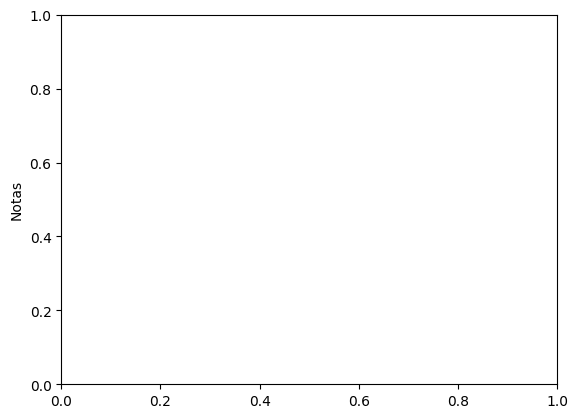

In [11]:
# Dados de exemplo
X_train = tf.constant([[1.0], [2.0], [3.0], [4.0]])
y_train = tf.constant([[2.0], [4.0], [6.0], [8.0]])

# Modelo de Regressão Linear Simples
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mean_squared_error')

# Treinamento do modelo
model.fit(X_train, y_train, epochs=1000, verbose=0)

# Previsão
X_new = tf.constant([[5.0]])
prediction = model.predict(X_new)
print("Predição:", prediction[0][0])
plt.ylabel('Notas')
plt.show()

In [12]:
# Ambiente CartPole do Gym
env = gym.make('CartPole-v1')

# Modelo Simples para Aprendizado por Reforço
model_reinforcement = tf.keras.Sequential([

    tf.keras.layers.Dense(24, activation='relu', input_shape=(env.observation_space.shape[0],)),
    tf.keras.layers.Dense(env.action_space.n, activation='linear')
])

model_reinforcement.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Treinamento por Reforço (exemplo fictício)
max_episodes = 1000  # Defina o número máximo de episódios

for episode in range(max_episodes):

    state = env.reset()
    done = False

    while not done:

        action = env.action_space.sample()
        next_state, reward, done, _ = env.step(action)
        target = reward + 0.95 * tf.reduce_max(model_reinforcement.predict(next_state.reshape(1, -1)))
        target_f = model_reinforcement.predict(state.reshape(1, -1))
        target_f[0][action] = target
        model_reinforcement.fit(state.reshape(1, -1), target_f, epochs=1, verbose=0)
        state = next_state

    # Condição de parada
    if episode % 10 == 0:

        average_reward = sum(reward for _ in range(10)) / 10.0
        print(f'Episode {episode}, Average Reward: {average_reward}')

        # Adicionando uma condição de parada
        if average_reward == 1:  # Pode ajustar esse valor conforme necessário

            print(f'Solved after {episode} episodes!')
            break

ValueError: too many values to unpack (expected 4)

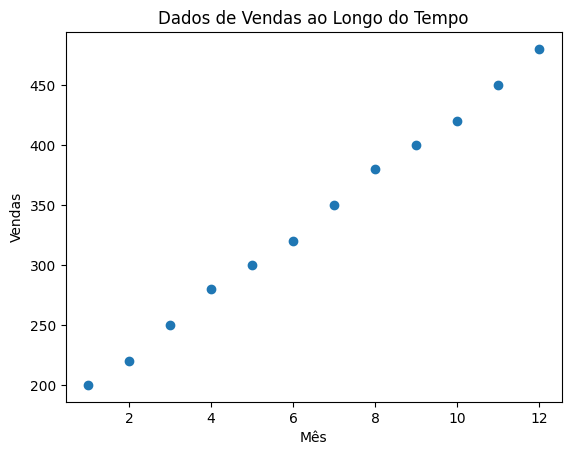

NameError: name 'X_test' is not defined

In [13]:
# Crie dados fictícios de vendas ao longo do tempo
np.random.seed(42)
meses = np.arange(1, 13)
vendas = np.array([200, 220, 250, 280, 300, 320, 350, 380, 400, 420, 450, 480])

# Crie um DataFrame
dados = pd.DataFrame({'Mes': meses, 'Vendas': vendas})

# Visualize os dados
plt.scatter(dados['Mes'], dados['Vendas'])
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Dados de Vendas ao Longo do Tempo')
plt.show()

# Normalização dos dados de treinamento
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Divida os dados em conjunto de treinamento e teste
X = dados[['Mes']]
y = dados['Vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo de regressão linear usando TensorFlow
model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(1,)),  # Camada de entrada
    tf.keras.layers.Dense(units=8, activation='relu'),  # Camada escondida com ativação ReLU
    tf.keras.layers.Dense(units=1)  # Camada de saída
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Treine o modelo por mais épocas
model.fit(X_train, y_train, epochs=500, verbose=0)

# Faça previsões no conjunto de teste
predictions = model.predict(X_test)

# Desfaça a normalização para avaliar o desempenho
min_sales = dados['Vendas'].min()
max_sales = dados['Vendas'].max()

predictions_inverse = predictions * (max_sales - min_sales) + min_sales
y_test_inverse = y_test * (max_sales - min_sales) + min_sales

# Visualize as previsões em relação aos dados reais
plt.scatter(X_test, y_test_inverse, label='Dados Reais')
plt.plot(X_test, predictions_inverse, color='red', label='Previsões')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Previsões de Vendas com Regressão Linear (TensorFlow)')
plt.legend()
plt.show()

# Avalie o desempenho do modelo
erro_mse = mean_squared_error(y_test_inverse, predictions_inverse)

print(f'Erro Médio Quadrático (MSE): {erro_mse:.2f}')

# Faça uma previsão para o próximo mês
proximo_mes_scaled = scaler.transform(np.array([[13]]))
previsao_proximo_mes_scaled = model.predict(proximo_mes_scaled)
previsao_proximo_mes = scaler.inverse_transform(previsao_proximo_mes_scaled)[0, 0]

print(f'Previsão de Vendas para o Próximo Mês: {previsao_proximo_mes:.2f}')